<a href="https://colab.research.google.com/github/OussamaOB57/m1-miage/blob/Oussama-BOULIDAME/Copie_de_M1_MIAGE_TD_007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/fr/0/0b/Polytech_Lyon_logo.png" alt="drawing" height="200"/>

# Traitement de données & Programmation en Python
---



# TD 007

TD à thème :)


![Good luck!](https://media2.giphy.com/media/pF8PQGuxYGpEszkrwx/giphy.gif)


[Source du dataset](https://www.kaggle.com/datasets/dreb87/jamesbond)

Colonnes :

* Year - Release year of the movie.
* Movie - The movie title.
* Bond - Actor who played James Bond.
* Director - Director of the movie.
* Composer - Composer of the movie.
* Writer - Writer of the movie.
* Cinematographer - Cinematographer of the movie.
* Depicted_Film_Loc - Depicted location(s) of the movie.
* Shooting_Loc - Shooting location(s) of the move.
* Bond_Car_MFG - The manufacturer of the bond car.
* Bond_Girl_Nat - The nationality of the bond girl(s).
* US_Gross - The films U.S gross earnings.
* US_Adj: The films U.S gross earnings adjusted based on 2013.
* World_Gross - The films worldwide gross earnings.
* World_Adj - The films worldwide gross earnings adjusted based on 2013.
* Budget - The films budget.
* Budget_Adj - The films budget adjust based on 2013.
* Film_Length - The length of the movie.
* Avg_User_IMDB - The average user rating from IMDB.
* Avg_User_Rtn_Tom - The average user rating from Rotten Tomatoes.
* Conquests - The number of bond girls in the movie.
* Martinis - The number of martinis Bond consumed in the movie.
* BJB - The number of times bond stated "Bond, James Bond."
* Kills_Bond - The number of people Bond killed.
* Kills_Others - The number of people killed by someone other than bond.
* Top_100 - A flag where 1 means the movie had Billboard/UK top 100 song, 0 means it didn't.
* Video_Game - A flag where 1 means the movie was made into a video game, 0 means it didn't.

Elements à consulter:



Doc                                   |             Link
--------------------------------------|------------------------------------
Github Helper      | [>link<](#scrollTo=Github_101)
Python en 30 jours | [>link<](https://moncoachdata.com/courses/apprendre-python-en-30-jours/)
Get started with pandas | [>link<](https://colab.research.google.com/notebooks/snippets/pandas.ipynb)

## Intro

Le premier bloc devrait toujours contenir les installs/imports dont on aura besoin pour le reste

In [ ]:

# Installs
# ! pip install packagename
print("Python is awesome 👍")

Python is awesome 👍


In [ ]:
# Imports
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

## 007

1. Lire le dataset `jamesbond.csv` dans une variable `_007`
2. Exploration de données (dans une variable puis afficher):
   * Quel est le plus ancien film de 007 ? 
   * Qui est le plus ancien 007 ?
   * Qui à jouer le plus de fois 007 ? (acteur)  
3. Quel est le côut moyen de la realisation d'un James Bond ?
4. Quels sont les lieux de tournage/représentés les plus populaires 🏝️ ? (En fonction du lieu de tournage réel **ou** de ceux représentés, déterminez les lieux les plus utilisés dans les films **graphiquement**.)
5. Quel est la (marque) voiture la/les moins utilisée dans les films de 007 ?
6. Calculer le nombre de martinis bus par James Bond par film.
7. En prenant en compte le taux d'alcool moyen dans un martini (google) Est ce que James Bond avait le droit de conduire en France?
8. Dans quel film James Bond dit ça phrase mythique le plus de fois ?
9. Quel James Bond comporte le plus de kill ? (Tout confondu)
10. Quel est le James Bond le plus rentable de tous les temps (Côuts/Bénéfices) ?
11. Quel film de 007 a coûté le plus cher *par decennie* ? (Decomposez la réponse en deux ou plusieurs parties)
12. Representez dans une carte du monde les lieux de tournages par film (la taille de la bulle sera determinée par la popularité du lieu Ref. Question precédente)

> Bonus 
* Quel est le meilleur James Bond de tous les temps ? Trouvez un angle d'approche et de justification (par la data) à votre réponse :)

In [ ]:
# Code here
import pandas as pd
import matplotlib.pyplot as plt
_007 = pd.read_csv("jamesbond.csv", sep=",")
print(_007)


    Year                            Movie            Bond            Director  \
0   1962                           Dr. No    Sean Connery       Terence Young   
1   1963            From Russia with Love    Sean Connery       Terence Young   
2   1964                       Goldfinger    Sean Connery        Guy Hamilton   
3   1965                      Thunderball    Sean Connery       Terence Young   
4   1967              You Only Live Twice    Sean Connery       Lewis Gilbert   
5   1969  On Her Majesty's Secret Service  George Lazenby       Peter R. Hunt   
6   1971             Diamonds Are Forever    Sean Connery        Guy Hamilton   
7   1973                 Live and Let Die     Roger Moore        Guy Hamilton   
8   1974      The Man with the Golden Gun     Roger Moore        Guy Hamilton   
9   1977             The Spy Who Loved Me     Roger Moore       Lewis Gilbert   
10  1979                        Moonraker     Roger Moore       Lewis Gilbert   
11  1981               For Y

In [ ]:
#Quel est le plus ancien film de 007 ?
min_value = _007.Year.idxmin()
min_year = _007.iloc[min_value,0]
print(min_year)

#Qui est le plus ancien 007 ?
old_007= _007.iloc[min_value,2]
print(old_007)

#Qui à jouer le plus de fois 007 ? (acteur)
counts = _007['Bond'].value_counts()
#print(counts)
plus_freq = counts.index
plus_freq = counts.index[0]
print(plus_freq)

In [ ]:
#Quel est le côut moyen de la realisation d'un James Bond ?
moy_budget = _007['Budget'].mean()
print(moy_budget)

In [ ]:
#Quels sont les lieux de tournage/représentés les plus populaires 🏝️ ?
_007['pays'] = _007['Shooting_Loc'].str.split(',')
_007 = _007.explode('pays')
counts = _007['pays'].value_counts()
print(counts)
#graphiquement
counts.plot(kind='bar')
plt.show()
#afficher que le max
pays_max = counts.index[0]
print(pays_max)

In [ ]:
#Quel est la (marque) voiture la/les moins utilisée dans les films de 007 ?
counts = _007['Bond_Car_MFG'].value_counts()
print(counts)
car = counts.index
car = counts.index[-1]
print(car)

In [ ]:
  #Calculer le nombre de martinis bus par James Bond par film.
_007 = _007.drop_duplicates()
mart = _007.loc[:,["Movie", "Martinis"]].drop_duplicates(subset="Movie")
print(mart)

  #nombre total pour chaque BOND
_007 = _007.drop_duplicates(subset="Movie")
grouped = _007.groupby(['Bond'])
total_martinis = grouped['Martinis'].sum()
print(total_martinis)

In [ ]:
#En prenant en compte le taux d'alcool moyen dans un martini (google) Est ce que James Bond avait le droit de conduire en France?

#Non

In [ ]:
#Dans quel film James Bond dit ça phrase mythique le plus de fois ?

max_value = _007['BJB'].max()
max_rows = _007.loc[_007['BJB'] == max_value]
max_rows = max_rows.groupby([max_rows.index, 'Movie']).first().reset_index()
# print the movies after filter.
print(max_rows.loc[:,["Movie", "BJB"]])

                             Movie  BJB
0                       Goldfinger    2
1  On Her Majesty's Secret Service    2
2      The Man with the Golden Gun    2
3               For Your Eyes Only    2
4                 A View to a Kill    2
5          The World Is Not Enough    2


In [ ]:
#Quel James Bond comporte le plus de kill ? (Tout confondu)
_007 = _007.drop_duplicates(subset="Movie")
grouped = _007.groupby(['Bond'])
total_kills = grouped['Kills_Bond'].sum()
total_kills = total_kills.sort_values()
print(total_kills)
max_kills = total_kills.index[-1]
print(max_kills)


Bond
George Lazenby      5
Timothy Dalton     23
Sean Connery       72
Daniel Craig       83
Roger Moore        90
Pierce Brosnan    135
Name: Kills_Bond, dtype: int64
Pierce Brosnan


In [ ]:
#Quel est le James Bond le plus rentable de tous les temps (Côuts/Bénéfices) ?

_007['rentabilité'] =  _007['World_Adj'] - _007['Budget_Adj']
max_value = _007.rentabilité.idxmax()
max_movie= _007.loc[max_value,["Movie", "rentabilité"]]
print(max_movie)

Movie          Thunderball
rentabilité         974360
Name: 3, dtype: object


In [ ]:
#Quel film de 007 a coûté le plus cher par decennie ? (Decomposez la réponse en deux ou plusieurs parties)
_007['décennie'] = (_007['Year'] // 10) * 10


max_budget_movies = _007.loc[_007.groupby(['décennie'])['Budget_Adj'].idxmax()]
max_budget_movies = max_budget_movies.drop_duplicates(subset="Year")
print(max_budget_movies.loc[:,["Movie", "décennie"]])


                      Movie  décennie
3               Thunderball      1960
10                Moonraker      1970
14     The Living Daylights      1980
18  The World Is Not Enough      1990
21        Quantum of Solace      2000
23                  Spectre      2010


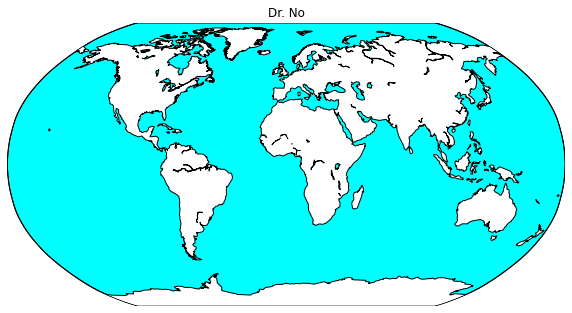

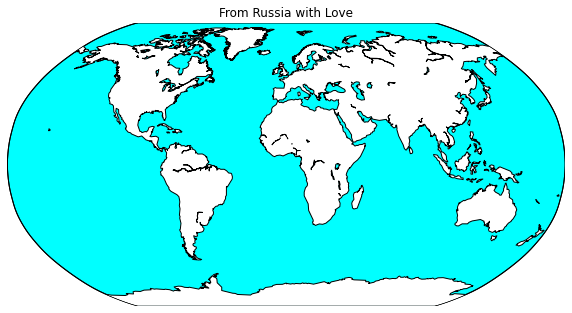

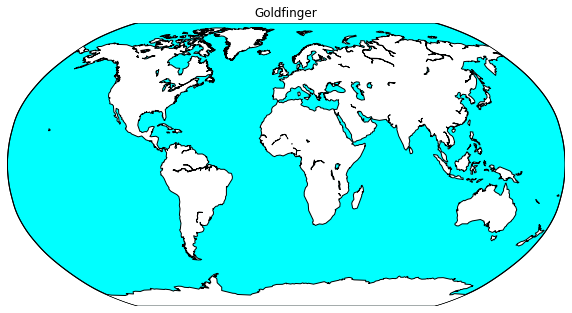

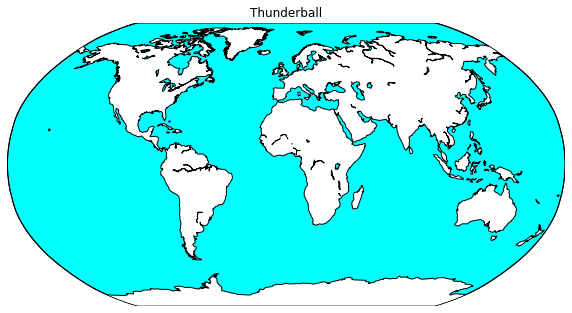

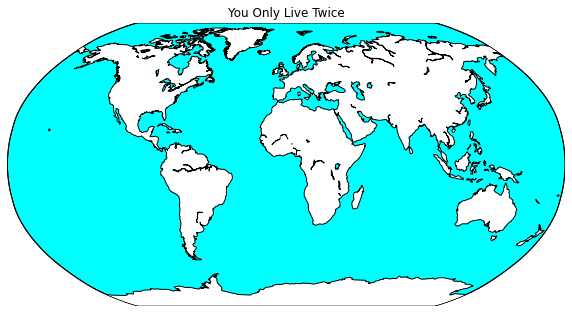

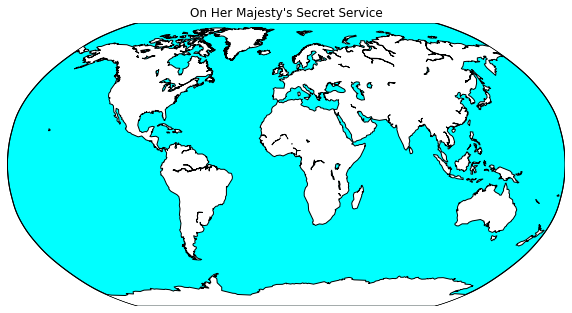

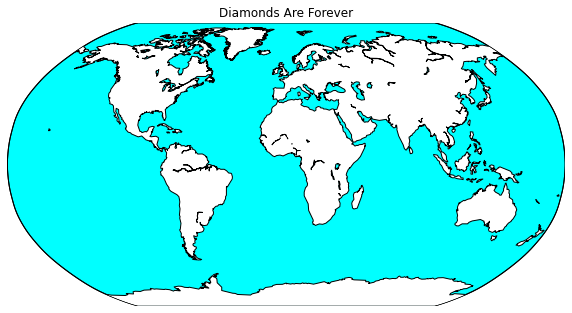

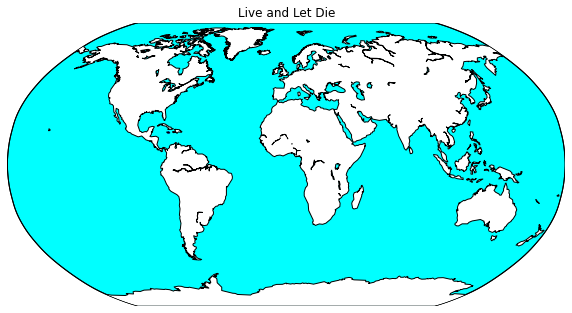

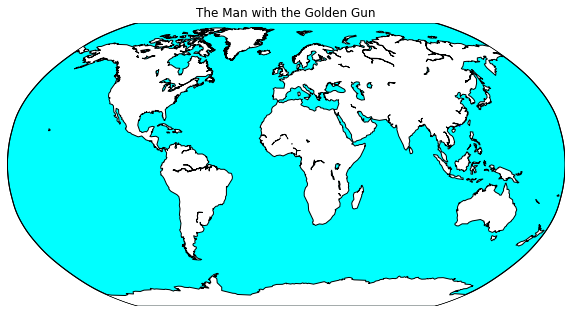

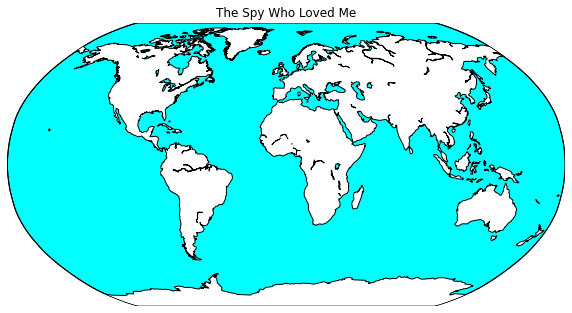

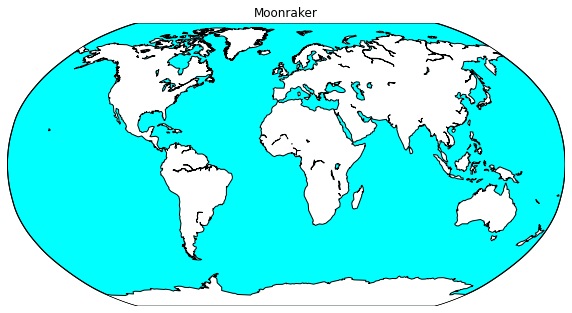

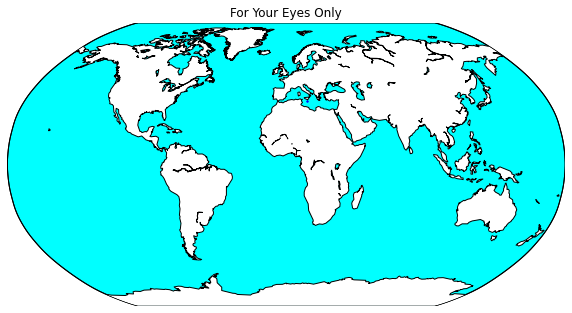

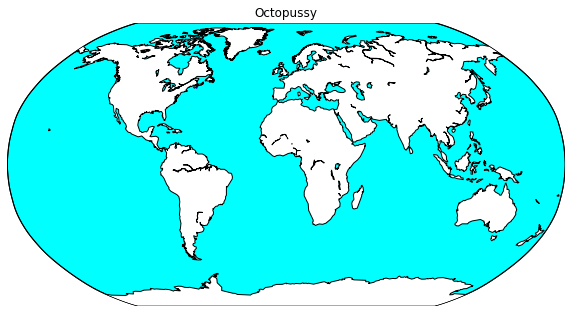

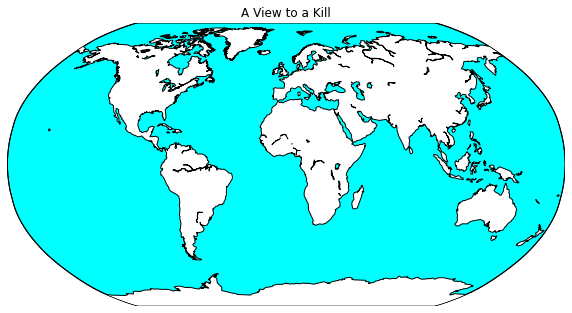

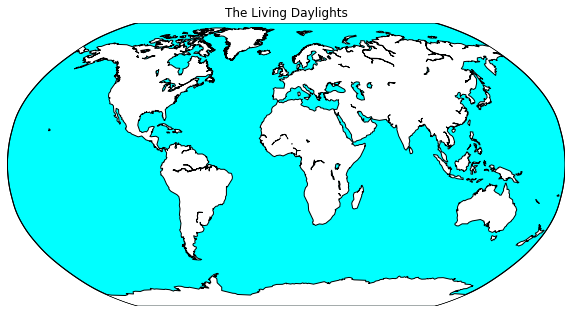

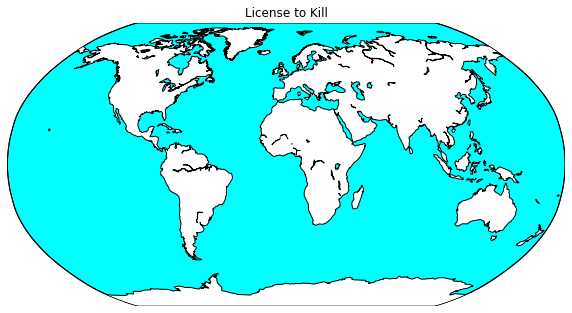

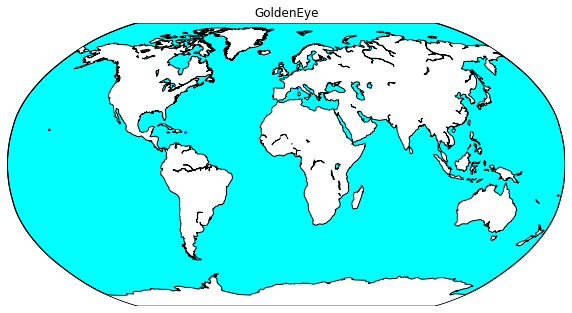

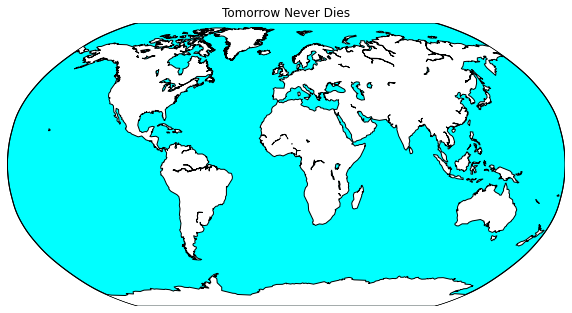

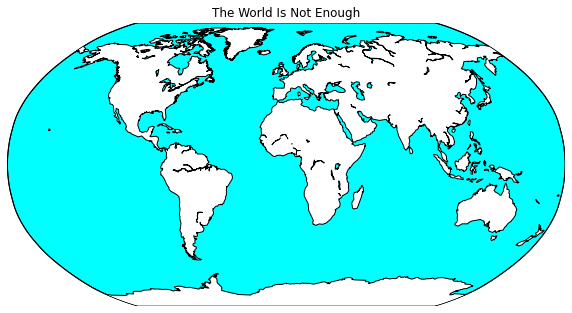

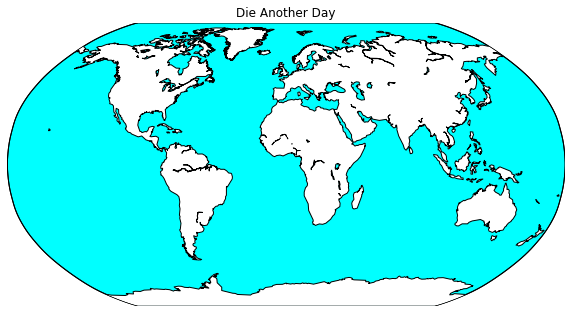

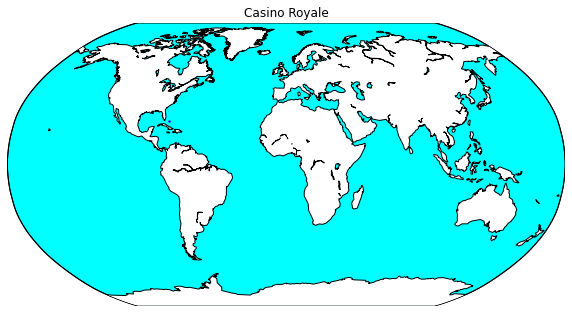

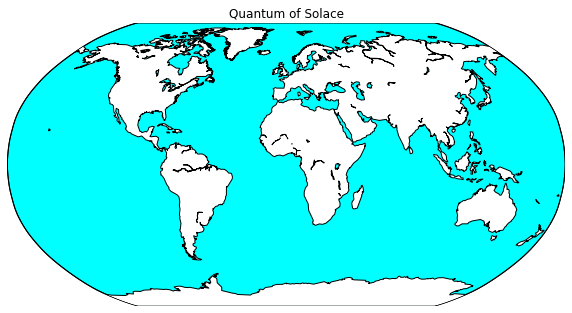

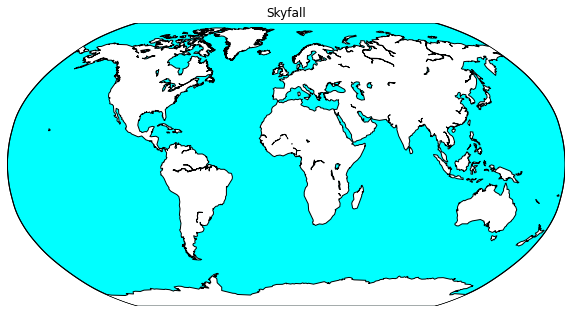

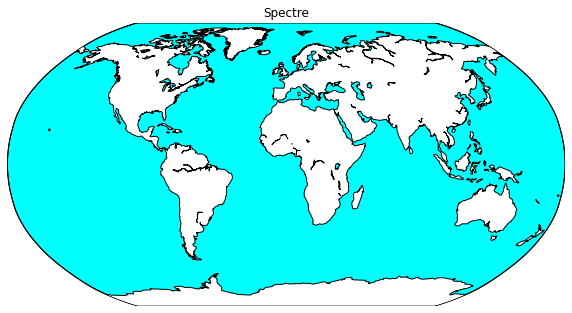

In [ ]:
#Representez dans une carte du monde les lieux de tournages par film (la taille de la bulle sera determinée par la popularité du lieu Ref. Question precédente)
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
geolocator = Nominatim(user_agent="geoapiExercises")

# pour chaque ligne du dataframe
for index, row in _007.iterrows():
    # Initialiser la figure et l'axe
    fig, ax = plt.subplots(figsize=(10,6))
    # Créer une carte du monde
    m = Basemap(projection='robin',lon_0=0,resolution='c')
    m.drawcoastlines()
    m.fillcontinents(color='white',lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    # Pour chaque lieu de tournage de ce film
    for location in row['Shooting_Loc'].split(','):
        location = geolocator.geocode(location)
        lats = location.latitude
        longs = location.longitude
        # convertir les coordonnées de latitude et longitude en x et y
        x, y = m(longs, lats)
        # Ajouter un point pour chaque lieu de tournage sur la carte
        ax.scatter(x, y, color='blue', s=2)
    plt.title(row['Movie'])
    # Afficher le graphique
    plt.show()



In [ ]:
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.4/880.4 KB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.6/219.6 KB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 75.9 MB/s eta 0:00:00
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=91ab839d6e2330b0694b4eaef0f67fadca3a4f0f4217c92671cc32d933312ece
  Stored in directory: /root/.cache/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp
